In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import scipy.misc
from skimage.io import imread
from glob import glob

In [ ]:
from keras.layers import Conv2D, BatchNormalization, Activation,Merge, merge
from keras.models import Model, Input
from keras.optimizers import Adam
import keras.backend as K

In [3]:
from dataIO import pk
import cv2 as cv
import os
import matplotlib.pyplot as plt

** Loading Data **

In [ ]:
X_train = pk.load(path_to_train)
X_validation = pk.load(path_to_valid)
X_test = pk.load(path_to_test)

In [6]:
X_train['blur_data']=X_train['blur_data'].astype(float)
X_train['data']=X_train['data'].astype(float)
X_validation ['blur_data']=X_validation['blur_data'].astype(float)
X_validation ['data']=X_validation['data'].astype(float)
X_test ['blur_data']=X_test['blur_data'].astype(float)
X_test ['data']=X_test['data'].astype(float)


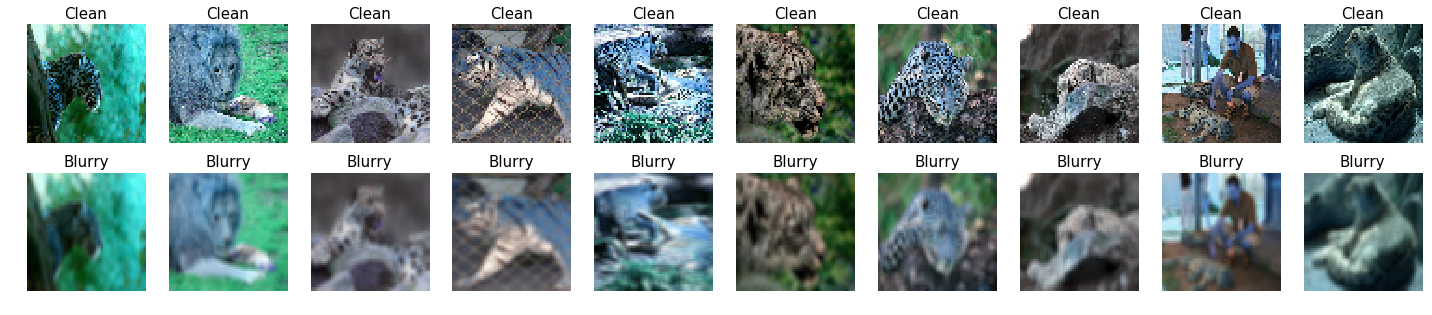

In [7]:
f, ax = plt.subplots(2,10,figsize=(25,5))
for i in range(10):
    ax[0,i].imshow(X_train['data'][i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(X_train['blur_data'][i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
plt.show()

** Defining CNN Model for Training Model **

In [ ]:
deblur_CNN_input = Input(shape=(64,64,3))

#HIDDEN LAYERS
deblur_CNN_layer1 = Conv2D(filters=128, kernel_size=10, strides = 1, padding='same')(deblur_CNN_input)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer1)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer1)

deblur_CNN_layer2 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer1)
deblur_CNN_layer2 = BatchNormalization()(deblur_CNN_layer2)
deblur_CNN_layer2 = Activation('relu')(deblur_CNN_layer2)

deblur_CNN_layer3 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer2)
deblur_CNN_layer3= BatchNormalization()(deblur_CNN_layer3)
deblur_CNN_layer3 = Activation('relu')(deblur_CNN_layer3)

deblur_CNN_layer4 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer3)
deblur_CNN_layer4 = BatchNormalization()(deblur_CNN_layer4)
deblur_CNN_layer4 = Activation('relu')(deblur_CNN_layer4)

deblur_CNN_layer5 = Conv2D(filters=128, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer4)
deblur_CNN_layer5 = BatchNormalization()(deblur_CNN_layer5)
deblur_CNN_layer5 = Activation('relu')(deblur_CNN_layer5)

deblur_CNN_layer6 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer5)
deblur_CNN_layer6 = BatchNormalization()(deblur_CNN_layer6)
deblur_CNN_layer6 = Activation('relu')(deblur_CNN_layer6)

deblur_CNN_layer7 = Conv2D(filters=512, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer6)
deblur_CNN_layer7 = BatchNormalization()(deblur_CNN_layer7)
deblur_CNN_layer7 = Activation('relu')(deblur_CNN_layer7)

deblur_CNN_layer8 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer7)
deblur_CNN_layer8 = BatchNormalization()(deblur_CNN_layer8)
deblur_CNN_layer8 = Activation('relu')(deblur_CNN_layer8)

deblur_CNN_layer9 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer8)
deblur_CNN_layer9 = BatchNormalization()(deblur_CNN_layer9)
deblur_CNN_layer9 = Activation('relu')(deblur_CNN_layer9)

deblur_CNN_layer10 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer9)
deblur_CNN_layer10 = BatchNormalization()(deblur_CNN_layer10)
deblur_CNN_layer10 = Activation('relu')(deblur_CNN_layer10)

deblur_CNN_layer11 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer10)
deblur_CNN_layer11 = BatchNormalization()(deblur_CNN_layer11)
deblur_CNN_layer11 = Activation('relu')(deblur_CNN_layer11)

deblur_CNN_layer12 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer11)
deblur_CNN_layer12 = BatchNormalization()(deblur_CNN_layer12)
deblur_CNN_layer12 = Activation('relu')(deblur_CNN_layer12)

deblur_CNN_layer13 = Conv2D(filters=256, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer12)
deblur_CNN_layer13 = BatchNormalization()(deblur_CNN_layer13)
deblur_CNN_layer13 = Activation('relu')(deblur_CNN_layer13)

deblur_CNN_layer14 = Conv2D(filters=64, kernel_size=7, strides = 1, padding='same')(deblur_CNN_layer13)
deblur_CNN_layer14 = BatchNormalization()(deblur_CNN_layer14)
deblur_CNN_layer14 = Activation('relu')(deblur_CNN_layer14)


#Direct Network
deblur_CNN_output = Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')(deblur_CNN_layer14)

deblur_CNN = Model(inputs= deblur_CNN_input, outputs=deblur_CNN_output )

#Network inspired by ResNet

'''res_image = Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')(deblur_CNN_layer14)

deblur_CNN_output = merge([res_image, deblur_CNN_input])

deblur_CNN = Model(deblur_CNN_input, deblur_CNN_output)
'''

In [ ]:
deblur_CNN.summary()

In [10]:
def plot_loss(train,valid):
    fig,ax = plt.subplots()     
    plt.xlabel('Training epoches')  
    plt.ylabel('Loss values')    
    x = range(len(train))

    ax.plot(x,train,'g',label = 'train set')
    ax.plot(x,valid,'r',label = 'validation set')
    plt.grid(True)  
    plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)  
    plt.show()
    plt.pause(0.001)

In [6]:
adam = Adam(lr= 0.00001)
deblur_CNN.compile(optimizer= adam, loss= 'mean_squared_error')


In [ ]:
deblur_CNN.load_weights(path_to_weights)
# Training
hist = deblur_CNN.fit( X_train['blur_data'],X_train['data'],batch_size=16, validation_data=(X_validation['blur_data'],X_validation['data']),epochs=10, )

**Save loss values for future check**

In [14]:
f = open('val_loss.txt','a')
for i in hist.history['val_loss']:
    f.write(str(i)+'\n')
f.close()
f = open('train_loss.txt','a')
for i in hist.history['loss']:
    f.write(str(i)+'\n')
f.close()

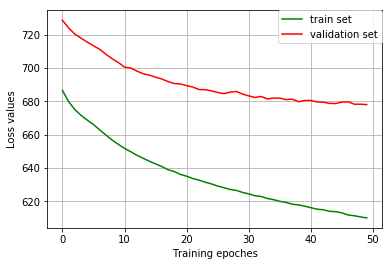

In [15]:
with open('val_loss.txt', 'r') as f:  
    data = f.readlines() 
    val = [float(i) for i in data]
with open('train_loss.txt', 'r') as f:  
    data = f.readlines() 
    train = [float(i) for i in data]
plot_loss(train,val) 

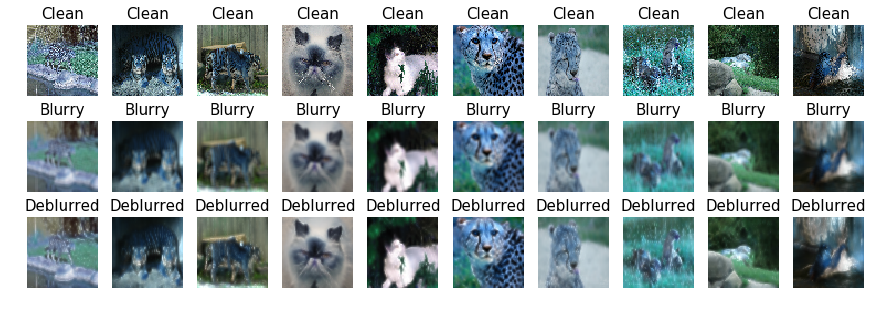

In [16]:
Deblurred = deblur_CNN.predict(X_test['blur_data'])
Deblurred = np.clip(Deblurred, 0, 255)
Deblurred=Deblurred.astype(np.uint8)
f, ax = plt.subplots(3,10, figsize=(15,5))
for i in range(10):
    ax[0,i].imshow(X_test['data'][450+i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(X_test['blur_data'][450+i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
    ax[2,i].imshow(Deblurred[450+i].astype('uint8'));  ax[2,i].axis('Off'); ax[2,i].set_title('Deblurred', size=15)
plt.show()

**Save weights **

In [17]:
deblur_CNN.save_weights(path_to_save_weights)

**Save deblurred images for classification**

In [22]:
X_deblur = {"data":Deblurred, "label":X_test['label']}

pk.dump(X_deblur, path_to_deblurred, overwrite=False)

pk.dump(X_deblur, path_to_deblurred, overwrite=True)